<a href="https://colab.research.google.com/github/pypsa-meets-africa/detect_energy/blob/master/image_download/EE_Tiles_Image_Export_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note most resources and inspiration are obtained from  https://colab.research.google.com/github/csaybar/EEwPython/blob/dev/10_Export.ipynb
https://colab.research.google.com/drive/17UeZK7vkt-8YgZ1n7Mqxer7awnN_Kdni?usp=sharing#scrollTo=G4YymCaAVwGn
https://automating-gis-processes.github.io/site/notebooks/Raster/reading-raster.html



## Connecting GEE with Google Services and initial imports/installation

**Authenticate to Earth Engine**

In [ ]:
!pip install earthengine-api #earth-engine Python API

Note: It is super easy and almost immediate to be given access to the earth engine api (https://signup.earthengine.google.com/#!/ )

In [ ]:
!earthengine authenticate 

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=-EtAFOEU7y5S6_suHxbeYSocAAwU1vDQdVSaFAdRBzc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhSirGocvUv3nVFIY9wfygCqEsq2ywINmp_HqTYUOhnmxvOzLPqD7o

Successfully saved authorization token.


In [ ]:
pip install geopandas

**Authenticate to Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Explore files mounted on drive and colab. Create data folders if needed. 

In [ ]:
import os

# list the folders and files in your drive
mydrive = '/content/drive/My Drive'
colab = '/content/drive/My Drive/Colab Notebooks'
print(os.listdir(mydrive))

# list the current working directory
print(os.getcwd())

# make a data folder in your Colab Notebook directory if it doesn't exist
data_folder = os.path.join(colab,'data')
os.path.isdir(data_folder)
if (not os.path.isdir(data_folder)):
  os.mkdir(data_folder)
# list the contents
print(os.listdir(colab))

['ee_images', 'Colab Notebooks', 'boundaries', 'tiles', 'tile2', 'ee_images_test', 'ee_images_test_scale10', 'ee_images_test_scale_100', 'ee_images_test_scale_5', 'l8_tiled_images', 'l8_tiff_files_test_s30_2_noraster4', 'l8_tiff_files_test_s30_2_noraster41', 'l8_tiff_files_test_s5', 's2_tiff_files_test_s100', 's2_tiff_files_test_s5', 's2_tiff_files_test2_s5', 's2_tiff_files_test_s100_vis', 's2_tiff_files_test_shalfm_vis', 's2_tiff_files_test_s1_vis', 's2_tiff_files_test_s3_vis', 's2_tiff_files_test_s3_vis2', 's2_tiff_files_test_s1_vis1']
/content
['EE Tiles Download Nigeria Test', 'EE Tiles Download Nigeria Test - Clean', 'data', 'Google Earth Engine Export - Nigeria test', 'EE Tiles Download Nigeria Test - CleanV2', 'PyPSA AFRICA EE Tiles  Image Export']


In [ ]:
# Earth Engine Python API
import geopandas as gpd
import ee
ee.Initialize()

In [ ]:
# Define function to make maps using folium
import folium
# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

# Define area of interest

As a starting point, we use the whole initial training area within Nigeria used by the DevSeed guys. You can extract the full geojson file for the country from https://geojson.io/#map=2/20.0/0.0 or upload onto drive and load from there. 

In [ ]:
aoi_geojson = '''{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              6.61376953125,
              5.542179397650237
            ],
            [
              7.717895507812499,
              5.542179397650237
            ],
            [
              7.717895507812499,
              6.7055261825665955
            ],
            [
              6.61376953125,
              6.7055261825665955
            ],
            [
              6.61376953125,
              5.542179397650237
            ]
          ]
        ]
      }
    }
  ]
}'''

Can also Upload onto google drive from your local system

In [ ]:
from google.colab import files
import json
uploaded = files.upload()

In [ ]:
# Then access upload file in colab like this, where file name is for example 'nigeria.geojson
file = uploaded[file_name]

In [ ]:
# explore aoi dataset
aoi = gpd.read_file(aoi_geojson)
print(aoi)

                                            geometry
0  POLYGON ((6.61377 5.54218, 7.71790 5.54218, 7....


In [ ]:
#Get the bounding box
bbox = aoi.total_bounds
print(bbox) # see the coordinates

[6.61376953 5.5421794  7.71789551 6.70552618]


In [ ]:
#Make it a GEE rectangle around bounding box coordinates
gee_aoi = ee.Geometry.Rectangle(bbox.tolist())

In [ ]:
#Extract some additional info
gee_aoi = ee.Geometry.Rectangle(bbox.tolist())
gee_aoi_coords = gee_aoi.getInfo()['coordinates']
center = aoi.centroid[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [ ]:
# unpack gee aoi coordinates into tuple
# this is just to double check we are using same geomtries acrosss
coord_list_tuple = []
for i in range (len(gee_aoi.getInfo()['coordinates'][0])):
  tuple_n = tuple(gee_aoi.getInfo()['coordinates'][0][i])
  coord_list_tuple.append(tuple_n)


In [ ]:
frome shapely.geometry import Polygon
gdf_aoi_geom_gee = Polygon(coord_list_tuple)

Load map with folium  to visualize area of interest. Note: Looks like there may be a slight mismatch between GEE calculated geometry and geojson one. 

In [ ]:
m = folium.Map(location=[center.y, center.x], tiles="OpenStreetMap", zoom_start=10)

folium.Marker(
    location=[center.y, center.x],
    popup='Center',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

folium.features.GeoJson(aoi_geojson,
                        style_function = lambda x: {'color':'blue', 'fillcolor':'transparent'}
                        ).add_to(m)
    
m

# Export Landsat images

In [ ]:
# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'
# query GEE with landsat

l8_image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
    .filterDate('2020-01-01', '2020-08-31')\
    .median()


# note it is possible to add additional filters on there such as location, bands, cloudyness etc such as:

     #.filterDate('2020-01-01', '2020-12-31')\
#.sort('CLOUDY_PIXEL_PERCENTAGE')\
#.first()

In [ ]:
# Filter image by area of interest
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

l8_image_filtered = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
    .filterDate('2020-01-01', '2020-08-31')\
    .filterBounds(gee_aoi)\
    .median()

In [ ]:
# Define visualization parameters
l8_vis_params = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
}

In [ ]:
# Visualize area nd landsat image
Mapdisplay(center=[center.y, center.x],
           dicc={'L8':l8_image_filtered.getMapId(l8_vis_params)}, 
           zoom_start=8)


In [ ]:
# Set to initial nigeria training area
# Landsat 8 surface reflextance, cloud mask, make RGB mosaic
# Redefine image based on filters
band_sel = ('B2', 'B3', 'B4', 'B5') # note that since we have bands outside RGB, now this wont be viewable in JPG or drive directly, use l8_vis_params to download viewable image

l8_image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
    .filterDate('2020-01-01', '2020-08-31')\
    .select(band_sel)\
    .filterBounds(gee_aoi)\
    .median()

l8_image.getInfo()

**Visualize area with a map and band visualization parameters from above**

In [ ]:
Mapdisplay(center=[center.y, center.x],
           dicc={'L8':l8_image.getMapId(l8_vis_params)}, 
           zoom_start=8)

In [ ]:
# Folder name can be not yet existing, will be created by Drive
# Change folders raster names etc to appropiate ones in your drive
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 'l8_tiff_files_test'
raster_name = 'l8_nigeria_test_s100'

# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': l8_image,
    'description': 'Landsat8_2020_Nigeria_s100_test',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 100, # this refers to meters per pixel
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    #'fileDimensions': 256, # uncomentting this makes it so image is exported tile by tile
    'crs':'EPSG:4326',
    #'maxPixels': 1e13,
    #'formatOptions': {
      #'cloudOptimized': 'true'
    #},
})
# start export
#note that export continues on background, but you can check on progress by running below block
task.start()

In [ ]:
# export continues in background while you can continue to run other stuff, but you can check on export status here
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).
Polling for task (id: E7OUJXFMI3Q44R4UXCCCGEEM).


# Load test area data back in from Drive 

In [ ]:
%pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import rasterio as rio
%matplotlib inline

**Load rasters to make map**

In [ ]:
# Loading a raster from drive
raster_path = os.path.join(output_mount_folder, output_drive_folder, raster_name)
l8_raster_path = ".".join([raster_path, "tif"])

# Exploring Raster data
with rio.open(l8_raster_path, 'r') as l8_raster:
  print(l8_raster.bounds)
  print(l8_raster.meta)

BoundingBox(left=6.6133971216879175, bottom=5.5417069877333285, right=7.718324921154929, top=6.705923595952228)
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1230, 'height': 1296, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195215, 0.0, 6.6133971216879175,
       0.0, -0.0008983152841195215, 6.705923595952228)}


# Visualize raster data

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

Plot bozes with different colors to evaluate band distribution

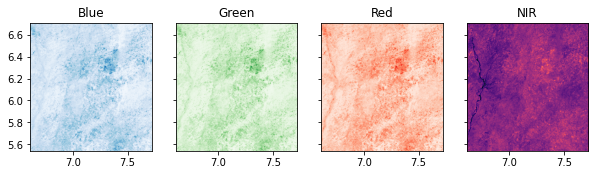

In [ ]:
with rio.open(l8_raster_path, 'r') as l8_raster:
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

  # Plot Red, Green and Blue (rgb)
  show((l8_raster, 1), cmap='Blues', ax=ax1)
  show((l8_raster, 3), cmap='Reds', ax=ax3)
  show((l8_raster, 2), cmap='Greens', ax=ax2)
  show((l8_raster, 4), cmap='magma', ax=ax4)

  # Add titles
  ax1.set_title("Blue")
  ax2.set_title("Green")
  ax3.set_title("Red")
  ax4.set_title("NIR")

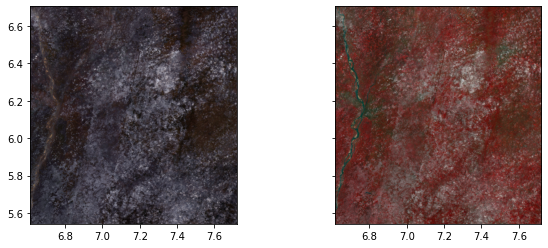

In [ ]:
from rasterio.plot import reshape_as_image
import numpy

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Open and read the raster data
with rio.open(l8_raster_path, 'r') as l8_raster:
  l8_data = l8_raster.read()
  
# To plot as RGB we have to normalize the data
l8_image = numpy.empty(l8_data.shape, dtype=numpy.float)
for band in range(l8_data.shape[0]):
  l8_image[band] = normalize(l8_data[band])


fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), sharey=True)
show(l8_image[[2,1,0],:,:], transform=l8_raster.transform, adjust='linear', ax=ax1) # RGB
show(l8_image[[3,2,1],:,:], transform=l8_raster.transform, adjust='linear', ax=ax2) # False Color IR

# Export tile by tile at scale of 5m per pixel, viewable in Drive

In [ ]:
# This created RGB version of original landsat image so we can see it
l8_image_vis = l8_image.visualize(bands = ['B4', 'B3', 'B2'])

In [ ]:
# We will save it to Google Drive for later reuse and loading into model
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 'l8_tiff_files_test_s5_tiled'
raster_name = 'l8_nigeria_test_s5_tiled'

# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': l8_image_vis,
    'description': 'Landsat8_2020_Nigeria_s5_test',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 5,
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    'fileDimensions': 256, # note this is uncommented here so exporting tile by tile
    'crs':'EPSG:4326',
    'maxPixels': 1e13, 
    'formatOptions': {
      'cloudOptimized': 'true'
    },
})
task.start()

In [ ]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

# Export tile by tile from Sentinel 2

In [ ]:
aoi.total_bounds

array([6.61376953, 5.5421794 , 7.71789551, 6.70552618])

In [ ]:
band_sel = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12'] # bands collected
band_sel_vis = ['B2', 'B3', 'B4'] # bands collected for visualisation

In [ ]:
# select image as we did for landsat
sentinel_scenes = ee.ImageCollection("COPERNICUS/S2")\
    .filterBounds(gee_aoi)\
    .filterDate('2017-05-02', '2019-05-03')\
    .select(band_sel)

sentinel_mosaic = sentinel_scenes.mean().rename(band_sel) # this is so we can extract specific bands only later

In [ ]:
# this version allows to visualize images that are exported
sentinel_scenes_vis = ee.ImageCollection("COPERNICUS/S2_SR")\
    .filterBounds(gee_aoi)\
    .select(band_sel_vis)\
    .median()

sentinel_mosaic_vis = sentinel_scenes_vis.rename(band_sel_vis)

In [ ]:
# Explore some of the data on here
scenes = sentinel_scenes.getInfo()
[print(scene['id']) for scene in scenes["features"]]
sentinel_mosaic.getInfo()

In [ ]:
s2_vis_params = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
}

# note that only max 3 bands can be visualized, hence why only 3 included in each visualization
s2_vis_params_2 = {
  'bands': [ 'B8', 'B11', 'B12'],
  'min': 0,
  'max': 3000,
}



**Visualize what the different bands look like with MapDisplay**

In [ ]:
Mapdisplay(center=[center.y, center.x],
           dicc={'S2':sentinel_mosaic.getMapId(s2_vis_params_2)}, 
           zoom_start=12)

In [ ]:
Mapdisplay(center=[center.y, center.x],
           dicc={'S2':sentinel_mosaic_vis.getMapId(s2_vis_params)}, 
           zoom_start=12)

Export images to drive at 100m/pixel res, with RGB bands only

In [ ]:
# if we want to export images that can be seen in JPEG or tiff, select 3 bands only here
# However, the full tiff files have more info so can do this just for some sanity checks
# you can 
s2_image_vis_2 = sentinel_scenes_vis.visualize(bands = ['B2', 'B3', 'B4'], min = 0, max = 5000)

In [ ]:
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 's2_tiff_files_test_s100_vis'
raster_name = 's2_nigeria_test_s100_vis'

task = ee.batch.Export.image.toDrive(**{
    'image': s2_image_vis_2, # download full tiff files by changing this to sentinel mosaic
    'description': 'nigeria test images_by_tile_s100_vis',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 100,
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    #'fileDimensions': 256,
    'crs':'EPSG:4326',
    #'maxPixels': 1e13, 
    #'formatOptions': {
      #'cloudOptimized': 'true'
    #},
})


task.start()


In [ ]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Export images to drive at 3m/pixel res with full band selected from above, not just RGB. Will appear blank/black in drive but can read raster data back in. 

In [ ]:
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 's2_tiff_files_test_s3'
raster_name = 's2_nigeria_test_s3'

# Export the image, specifying scale and region.
# There may be a bug here, not sure GEE export can write to a folder beyond depth 1 in a google drive
task = ee.batch.Export.image.toDrive(**{
    'image': sentinel_mosaic,
    'description': 'nigeria test images_by_tile_s3',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 3,
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    'fileDimensions': 256, # since this is uncommented we are exporting 256 by 256 pixel ty;
    'crs':'EPSG:4326',
    'maxPixels': 1e13, 
    #'formatOptions': {
      #'cloudOptimized': 'true'
    #},
})


task.start()

Export at 1m per pixel as single TIFF file

In [ ]:
# Note this will take at least a couple hours for the test region, will probably need to run a couple days for an entire country unless we find some more efficient method
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 's2_tiff_files_test_s1_vis'
raster_name = 's2_nigeria_test_s1_vis'

# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': s2_image_vis_2,
    'description': 'nigeria test images_by_tile_s1_vis',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 1,
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    #'fileDimensions': 256, # single
    'crs':'EPSG:4326',
    'maxPixels': 1e13, 
    #'formatOptions': {
      #'cloudOptimized': 'true'
    #},
})


task.start()

In [ ]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

# Load Sentinel Raster Data back in from Drive and Plot

In [ ]:
# Define folder and file info we want to access again
output_mount_folder = '/content/drive/My Drive/'
output_drive_folder = 's2_tiff_files_test_s100_vis'
raster_name = 's2_nigeria_test_100_vis'

In [ ]:
# Loading a raster and making a map
raster_path = os.path.join(output_mount_folder, output_drive_folder, raster_name)
s2_raster_path = ".".join([raster_path, "tif"])

# Check some attributes
with rio.open(s2_raster_path, 'r') as s2_raster:
  print(s2_raster.bounds)
  print(s2_raster.meta)

BoundingBox(left=6.6133971216879175, bottom=5.5417069877333285, right=7.718324921154929, top=6.705923595952228)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1230, 'height': 1296, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195215, 0.0, 6.6133971216879175,
       0.0, -0.0008983152841195215, 6.705923595952228)}


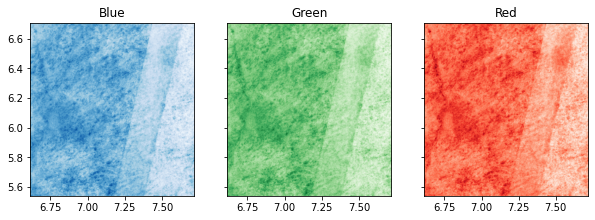

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline
# note that only 3 bands selected for this s2 run, hence code slightly different from above
with rio.open(s2_raster_path, 'r') as s2_raster:
  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

  # Plot Red, Green and Blue (rgb)
  show((s2_raster, 1), cmap='Blues', ax=ax1)
  show((s2_raster, 3), cmap='Reds', ax=ax3)
  show((s2_raster, 2), cmap='Greens', ax=ax2)

  # Add titles
  ax1.set_title("Blue")
  ax2.set_title("Green")
  ax3.set_title("Red")

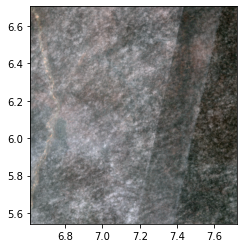

In [ ]:
from rasterio.plot import reshape_as_image
import numpy

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Open and read the raster data
with rio.open(s2_raster_path, 'r') as s2_raster:
  s2_data = s2_raster.read()
  
# To plot as RGB we have to normalize the data
s2_image = numpy.empty(s2_data.shape, dtype=numpy.float)
for band in range(s2_data.shape[0]):
  s2_image[band] = normalize(s2_data[band])


ax1 = plt.plot(figsize=(10, 4), sharey=True)
show(s2_image[[2,1,0],:,:], transform=s2_raster.transform, adjust='linear', ax=ax1) # RGB

# Load in lines Data from WP5

In [ ]:
from google.colab import files
import json
uploaded = files.upload()

Saving africa_all_lines_clean.geojson.txt to africa_all_lines_clean.geojson.txt


In [ ]:
file_name = 'africa_all_lines_clean.geojson.txt'
file = uploaded[file_name]
clean_line_data_json = json.loads(file.decode("utf-8"))

In [ ]:
line_gdf = geopandas.read_file(file_name)
line_gdf.head()

,line_id,bus0,bus1,voltage,circuits,length,underground,under_construction,tag_type,tag_frequency,country,geometry
0,380986751-1,None,None,220000,1,40467.295973,False,False,line,50,algeria,"LINESTRING (-1.83638 34.78691, -1.83590 34.789..."
1,173682341-1,None,None,400000,1,168.067783,False,False,line,50,algeria,"LINESTRING (-0.90176 35.08983, -0.90181 35.090..."
2,655093026-1,None,None,220000,1,64.987785,False,False,line,50,algeria,"LINESTRING (0.14621 34.90905, 0.14639 34.90922..."
3,383315204-1,None,None,220000,1,98637.025052,False,False,line,50,algeria,"LINESTRING (3.38017 36.71034, 3.38385 36.71236..."
4,655093020-1,None,None,220000,1,110.799435,False,False,line,50,algeria,"LINESTRING (0.14661 34.90939, 0.14672 34.90930..."


In [ ]:
# filter by nigeria data only
nigeria_line_gdf = line_gdf.loc[line_gdf['country'] == 'nigeria'] 
nigeria_line_gdf.head()

,line_id,bus0,bus1,voltage,circuits,length,underground,under_construction,tag_type,tag_frequency,country,geometry
4198,671376884-1,None,None,330000,1,44.372887,False,False,line,50,nigeria,"LINESTRING (4.57850 7.80170, 4.57872 7.80203)"
4199,782531821-1,None,None,330000,1,112.986562,False,False,line,50,nigeria,"LINESTRING (8.56931 7.62724, 8.56878 7.62696, ..."
4200,556551853-1,None,None,330000,1,366.058325,False,False,line,50,nigeria,"LINESTRING (6.83446 9.97342, 6.83121 9.97292)"
4201,565103749-1,None,None,132000,1,63199.737055,False,False,line,50,nigeria,"LINESTRING (7.86359 8.80552, 7.86432 8.80559, ..."
4202,460928690-1,None,None,330000,2,16821.326211,False,False,line,50,nigeria,"LINESTRING (5.59130 6.48736, 5.59364 6.48605, ..."


Test bounds defines the area we are interested in, so we can only keep those values in GeoDF

In [ ]:
test_bounds = aoi.iloc[0].geometry
nigeria_line_df_test = nigeria_line_gdf[nigeria_line_gdf.geometry.intersects(test_bounds)]
nigeria_line_df_test.head()

,line_id,bus0,bus1,voltage,circuits,length,underground,under_construction,tag_type,tag_frequency,country,geometry
4209,671878383-1,None,None,330000,2,54.504062,False,False,line,50,nigeria,"LINESTRING (7.55785 6.40368, 7.55804 6.40413)"
4212,575700608-1,None,None,330000,1,70.165279,False,False,line,50,nigeria,"LINESTRING (6.80051 6.11760, 6.80114 6.11760)"
4213,575666919-1,None,None,330000,1,42.967430,False,False,line,50,nigeria,"LINESTRING (7.53839 6.45612, 7.53877 6.45604)"
4221,575700604-1,None,None,330000,1,1438.574595,False,False,line,50,nigeria,"LINESTRING (6.82068 6.11420, 6.83080 6.12219)"
4226,565837002-1,None,None,330000,1,280.974108,False,False,line,50,nigeria,"LINESTRING (6.80377 6.11694, 6.80623 6.11749)"


# Load in bus data from WP5

In [ ]:
from google.colab import files
import json
uploaded = files.upload()

Saving africa_all_buses_clean.geojson.txt to africa_all_buses_clean.geojson.txt


In [ ]:
file_name = 'africa_all_buses_clean.geojson.txt'
file = uploaded[file_name]
clean_bus_data_json = json.loads(file.decode("utf-8"))

In [ ]:
bus_gdf = geopandas.read_file(file_name)
bus_gdf.head()

,bus_id,station_id,voltage,dc,symbol,under_construction,tag_substation,tag_area,lon,lat,country,geometry
0,221085150-1,None,400000,False,substation,True,transmission,241710.0,3.574875,36.250907,algeria,POINT (3.57488 36.25091)
1,221085150-2,None,220000,False,substation,True,transmission,241710.0,3.574875,36.250907,algeria,POINT (3.57488 36.25091)
2,751040071-1,None,400000,False,substation,True,transmission,120930.0,-0.168282,35.766294,algeria,POINT (-0.16828 35.76629)
3,751040071-2,None,220000,False,substation,True,transmission,120930.0,-0.168282,35.766294,algeria,POINT (-0.16828 35.76629)
4,383755661-1,None,220000,False,substation,True,transmission,26420.0,6.021865,31.760655,algeria,POINT (6.02186 31.76065)


In [ ]:
# filter by nigeria data only
nigeria_bus_gdf = bus_gdf.loc[bus_gdf['country'] == 'nigeria'] 
nigeria_bus_gdf.head()

,bus_id,station_id,voltage,dc,symbol,under_construction,tag_substation,tag_area,lon,lat,country,geometry
558,215459565-1,None,330000,False,substation,True,transmission,53840.0,6.654810,7.472026,nigeria,POINT (6.65481 7.47203)
559,215459565-2,None,132000,False,substation,True,transmission,53840.0,6.654810,7.472026,nigeria,POINT (6.65481 7.47203)
560,564429999-1,None,330000,False,substation,True,transmission,42820.0,8.274276,5.190738,nigeria,POINT (8.27428 5.19074)
561,565180232-1,None,132000,False,substation,True,transmission,6930.0,6.217693,7.549602,nigeria,POINT (6.21769 7.54960)
562,549391509-1,None,132000,False,substation,True,transmission,15210.0,3.379460,6.468492,nigeria,POINT (3.37946 6.46849)


In [ ]:
# filter by test bounds
test_bounds = aoi.iloc[0].geometry
nigeria_bus_df_test = nigeria_bus_gdf[nigeria_bus_gdf.geometry.intersects(test_bounds)]
nigeria_bus_df_test.head()

,bus_id,station_id,voltage,dc,symbol,under_construction,tag_substation,tag_area,lon,lat,country,geometry
585,671893504-1,None,330000,False,substation,True,transmission,77260.0,6.802414,6.116841,nigeria,POINT (6.80241 6.11684)
586,671893504-2,None,132000,False,substation,True,transmission,77260.0,6.802414,6.116841,nigeria,POINT (6.80241 6.11684)
612,671706478-1,None,330000,False,substation,True,transmission,254280.0,6.672202,6.180953,nigeria,POINT (6.67220 6.18095)
613,671706478-2,None,132000,False,substation,True,transmission,254280.0,6.672202,6.180953,nigeria,POINT (6.67220 6.18095)


In [ ]:
nigeria_asset_gdf_messy = pd.concat([nigeria_bus_gdf,nigeria_line_gdf ] , ignore_index = True)
nigeria_asset_gdf_messy.head()

# Create training vectors

In [ ]:
# remove useless columns for detection from gdf for now
clean_line_data_test = nigeria_line_df_test.drop(labels = ['line_id' , 'bus0' ,'bus1', 'circuits' , 'length', 'underground' , 'under_construction' , 'tag_type' , 'tag_frequency' , 'country'], axis = 1)
clean_line_data_test.head()

,voltage,geometry
4209,330000,"LINESTRING (7.55785 6.40368, 7.55804 6.40413)"
4212,330000,"LINESTRING (6.80051 6.11760, 6.80114 6.11760)"
4213,330000,"LINESTRING (7.53839 6.45612, 7.53877 6.45604)"
4221,330000,"LINESTRING (6.82068 6.11420, 6.83080 6.12219)"
4226,330000,"LINESTRING (6.80377 6.11694, 6.80623 6.11749)"


In [ ]:
# add dcolumn recognizing as asset type to combine both dataframes
import numpy as np
line_asset_class = np.repeat(['line'], len(clean_line_data_test))
clean_line_data_test.insert(0 , "asset_class" ,line_asset_class  )
clean_line_data_test.head()

,asset_class,voltage,geometry
4209,line,330000,"LINESTRING (7.55785 6.40368, 7.55804 6.40413)"
4212,line,330000,"LINESTRING (6.80051 6.11760, 6.80114 6.11760)"
4213,line,330000,"LINESTRING (7.53839 6.45612, 7.53877 6.45604)"
4221,line,330000,"LINESTRING (6.82068 6.11420, 6.83080 6.12219)"
4226,line,330000,"LINESTRING (6.80377 6.11694, 6.80623 6.11749)"


In [ ]:
# remove useless columns for detection from gdf for now
clean_bus_data_test = nigeria_bus_df_test.drop(labels = ['bus_id' , 'station_id' ,'dc', 'symbol' , 'under_construction' , 'tag_substation', 'tag_area' , 'lon' , 'lat' , 'country'], axis = 1)
clean_bus_data_test.head()

,voltage,geometry
585,330000,POINT (6.80241 6.11684)
586,132000,POINT (6.80241 6.11684)
612,330000,POINT (6.67220 6.18095)
613,132000,POINT (6.67220 6.18095)


In [ ]:
bus_asset_class = np.repeat(['substation'], len(clean_bus_data_test))
clean_bus_data_test.insert(0 , "asset_class" ,bus_asset_class  )
clean_bus_data_test.head()

,asset_class,voltage,geometry
585,substation,330000,POINT (6.80241 6.11684)
586,substation,132000,POINT (6.80241 6.11684)
612,substation,330000,POINT (6.67220 6.18095)
613,substation,132000,POINT (6.67220 6.18095)


In [ ]:
import pandas as pd
combined_asset_gdf = pd.concat([clean_line_data_test,clean_bus_data_test ] , ignore_index = True)
combined_asset_gdf.head()

In [ ]:
training_vectors= combined_asset_gdf
training_vectors_geom = training_vectors['geometry']

In [ ]:
import numpy as np
classes = np.unique(training_vectors.asset_class)
classes

array(['line', 'substation'], dtype=object)

In [ ]:
# convert different voltages to integer mapping for modeling
class_dict = dict(zip(classes, range(len(classes))))
class_dict        

{'line': 0, 'substation': 1}

In [ ]:
#training_vectors.total_bounds.tolist()
aoi_data_bb = ee.Geometry.Rectangle(training_vectors.total_bounds.tolist())

acess raster file created above

# Visualize training data using updated map display function

In [ ]:
%pip install geopandas rasterio rasterstats shapely
%pip install folium earthengine-api
%pip install scikit-learn
%pip install treeinterpreter

In [ ]:
from os import path as op
import pickle

import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.features import rasterize
from rasterstats.io import bounds_window
import rasterstats
import folium

from sklearn.model_selection import train_test_split

Mapdisplay function updated to work with geopandas/geojson

In [ ]:
# To make a map we first need some helper functions

# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if gpd.geodataframe.GeoDataFrame == type(v):
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz) 
      elif ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

In [ ]:
# Lets start by plotting all nigeria data to understand what we have available

s2_vis_params = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
}

Mapdisplay(center=[center.y, center.x],
           dicc={'S2':sentinel_mosaic.getMapId(s2_vis_params),
                 'TrainingData':nigeria_asset_gdf}, 
           zoom_start=12)


In [ ]:
# Plot training data on top of map for only training area considered
# Possible to change with Sentinel image we use from mosaic below, as well as vis params

s2_vis_params = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
}

Mapdisplay(center=[center.y, center.x],
           dicc={'S2':sentinel_mosaic.getMapId(s2_vis_params),
                 'TrainingData':training_vectors}, 
           zoom_start=12)


# Preliminary- Clean up Data

In [ ]:
# unpack GDF geometries into list of coordinates by geomtry/feature
labeled_lines_coords =[]
for i in range(len(training_vectors)):
  i_coord = list(training_vectors.geometry.iloc[i].coords)
  mylist_n = [j for i in i_coord for j in i] # unpack list so linestring format compatible with EE
  labeled_lines_coords.append(mylist_n)

**Here trying to compute GeoDF compatible geometries that do not have lines from test area and labeled lines geomtries. This is not yet working properly hence not integrated below**

In [ ]:
poly_inner = ee.Geometry.MultiPolygon(labeled_lines_coords)
poly_outer = gee_aoi
poly_diff = poly_outer.difference(poly_inner)

However returned object seems to be a function and I am having trouble unpacking individual geomtries, if anyone can help please go for it

In [ ]:
# these are various(unsuccessful) conversion attempts
unlabeled_coordinates_geom = poly_diff
broken_down_list = ee.Geometry.geometries(unlabeled_coordinates_geom)
mp_geom_list = ee.Geometry.MultiPolygon(broken_down_list)
mp_geom_geojson = mp_geom_list.toGeoJSONString

# Access raster files and prepare training data

In [ ]:
raster_file = '/content/drive/My Drive/s2_tiff_files_test_s100/s2_nigeria_test_s5.tif'
print(raster_file)

/content/drive/My Drive/s2_tiff_files_test_s100/s2_nigeria_test_s5.tif


In [ ]:
# a custom function for getting each value from the raster from GEE forum 
def all_values(x):
    return x

# this larger cell reads data from a raster file for each training vector
X_raw = []
y_raw = []
with rio.open(raster_file, 'r') as src:
    for (vol, geom) in zip(training_vectors.voltage, training_vectors.geometry):
        
        # read the raster data matching the geometry bounds
        window = bounds_window(geom.bounds, src.transform)
        # store our window information
        window_affine = src.window_transform(window)
        fsrc = src.read(window=window)
        # rasterize the geometry into the larger shape and affine
        mask = rasterize(
            [(geom, 1)],
            out_shape=fsrc.shape[1:],
            transform=window_affine,
            fill=0,
            dtype='uint8',
            all_touched=True
        ).astype(bool)
        
        # for each label pixel (places where the mask is true)
        label_pixels = np.argwhere(mask)
        
        for (row, col) in label_pixels:
            # add a pixel of data to X
            data = fsrc[:,row,col]
            one_x = np.nan_to_num(data, nan=1e-3)
            X_raw.append(one_x)
            # add the label to y
            y_raw.append(class_dict[vol])

In [ ]:
# convert the training data lists into the appropriate numpy array shape and format for scikit-learn
X = np.array(X_raw)
y = np.array(y_raw)
(X.shape, y.shape)

((2803, 6), (2803,))

In [ ]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# calculate class weights to allow for training on inbalanced training samples
volts, counts = np.unique(y_train, return_counts=True)
class_weight_dict = dict(zip(volts, 1 / counts))
class_weight_dict

{0: 0.0011947431302270011, 1: 0.0007117437722419929}

In [ ]:
print(counts)

[ 837 1405]
